# Multi-media Information Processing (EECE 7217) 

## Assignment 2

University of Memphis, Spring 2023

Bereket Kebede, Gradaute Student, EECE, U00827234 <br>
For this assignment, we are using a dataset from the UCI machine learning repository. <br>

Instructor: Prof. Michael Bartz

In [1]:
####################################################
# import necessary libraries 

import pandas as pd
import os
import json
import time
import pickle
import requests
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#%matplotlib notebook


In [2]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')  

In [13]:
####################################################
# retreive data

URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
def fetch_data(fname='seeds_dataset.txt'):
    """
    Helper method to retreive the ML Repository dataset.
    """
    response = requests.get(URL)
    outpath  = os.path.abspath(fname)
    with open(outpath, 'wb') as f:
        f.write(response.content)
    
    return outpath

# Fetch the data if required
DATA = fetch_data()

In [14]:
FEATURES  = [
    "area",
    "perimeter",
    "compactness",
    "length",
    "width",
    "asymmetry",
    "groove"
]

df = pd.read_csv(DATA, sep='\s+',names=FEATURES + ['target'])
display(df)

,area,perimeter,compactness,length,width,asymmetry,groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [15]:
X = df.loc[:, FEATURES]
y = df.loc[:, 'target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

print('Labels counts in y:', np.bincount(y)[1:])
print('Labels counts in y_train:', np.bincount(y_train)[1:])
print('Labels counts in y_test:', np.bincount(y_test)[1:])

Labels counts in y: [70 70 70]
Labels counts in y_train: [46 52 49]
Labels counts in y_test: [24 18 21]


## Logistic Regression

predicted: [2 3 2 3 1 2 1 3 3 3 2 1 1 1 1 3 3 1 1 1 1 2 2 3 1 3 1 3 3 2 2 2 2 1 2 2 3
 2 1 3 1 3 2 3 2 2 3 3 2 3 2 3 2 2 3 1 3 3 3 3 2 3 2]
true class: [1 3 1 3 1 2 1 3 3 3 2 1 1 1 1 3 3 1 1 1 1 1 2 3 1 3 1 3 1 2 2 2 2 1 1 2 3
 2 1 3 1 3 2 3 2 2 3 3 2 3 2 3 2 2 1 1 3 3 1 3 2 1 2]


C:\Users\Berek\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


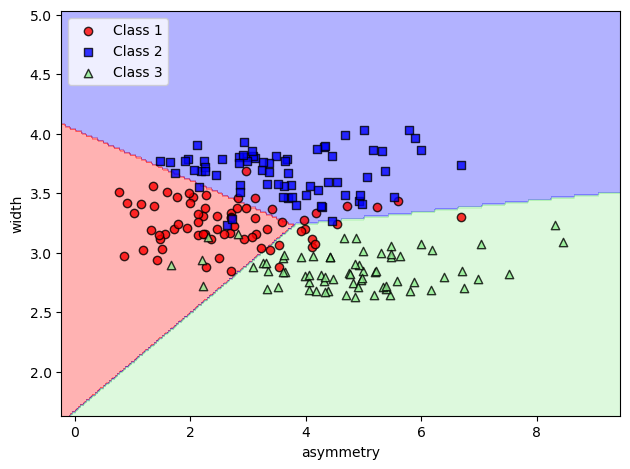

In [16]:
selecte_feature_1 = FEATURES[5]
selecte_feature_2 = FEATURES[4]

lr = LogisticRegression()
lr.fit(X_train.loc[:, [selecte_feature_1, selecte_feature_2]],
       y_train)

print('predicted:', lr.predict(X_test.loc[:, [selecte_feature_1, selecte_feature_2]]))
print('true class:', np.array(y_test))

plot_decision_regions(X.loc[:, [selecte_feature_1, selecte_feature_2]].to_numpy(),
                      y, classifier=lr)

#plt.title('not hello')
plt.xlabel(selecte_feature_1)
plt.ylabel(selecte_feature_2)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

predicted: [1 3 2 3 1 2 1 3 3 3 2 1 1 1 1 3 3 1 1 1 1 1 2 3 1 3 1 3 1 2 2 2 2 1 3 2 3
 2 1 3 3 3 2 3 2 2 3 3 2 3 2 3 2 2 3 1 3 3 3 3 2 3 2]
true class: [1 3 1 3 1 2 1 3 3 3 2 1 1 1 1 3 3 1 1 1 1 1 2 3 1 3 1 3 1 2 2 2 2 1 1 2 3
 2 1 3 1 3 2 3 2 2 3 3 2 3 2 3 2 2 1 1 3 3 1 3 2 1 2]


C:\Users\Berek\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


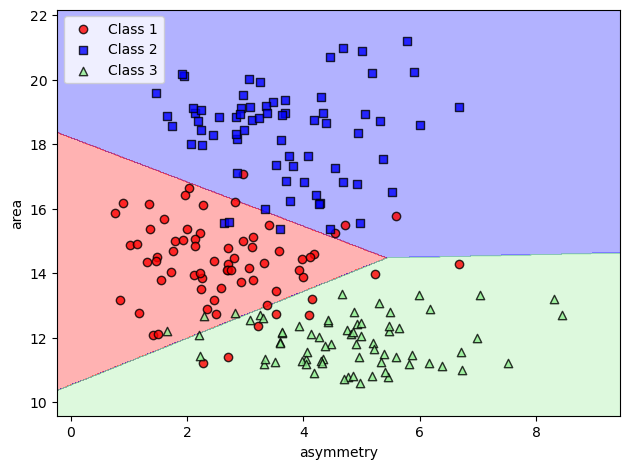

In [17]:
selecte_feature_1 = FEATURES[5]
selecte_feature_2 = FEATURES[0]

lr = LogisticRegression()
lr.fit(X_train.loc[:, [selecte_feature_1, selecte_feature_2]],
       y_train)

print('predicted:', lr.predict(X_test.loc[:, [selecte_feature_1, selecte_feature_2]]))
print('true class:', np.array(y_test))

plot_decision_regions(X.loc[:, [selecte_feature_1, selecte_feature_2]].to_numpy(),
                      y, classifier=lr)

#plt.title('hello')
plt.xlabel(selecte_feature_1)
plt.ylabel(selecte_feature_2)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()